# Ejercicios clase: Logística

1. Entra en Kaggle.com y busca por el dataset Titanic. Acepta las reglas y descárgate el dataset. Carga en Python, a través de pandas, el csv llamado “train” y realiza un head para comprobar que has cargado correctamente los datos.


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
# Ejercicio 1
train=pd.read_csv("train.csv")

2. Ahora analizaremos más generalmente el dataset:

    a. Cuantos NA hay en el dataset y en que columnas?\
    b. Que nos dice la variable SibSp y Parch? Cómo se distribuyen estas variables?\
    c.Estudia la función countplot del paquete seaborn. Haz un countplots utilizando las columnas Pclass y Sex.\
    d.Haz un histograma de la variable Age\
    e.Qué columnas se podrían descartar “en principio” de un modelo solo con observar que significan?\
    f.La columna Cabin tiene muchos missings, con que podría tener relación esta columna? Crea una columna para decir si esta variable está informada. Haz un ‘group by’ con esta columna junto a otras variables para encontrar alguna posible relación.\
    g.Mira las relaciones que puede tener Embarked con Survived.


In [ ]:
# a
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

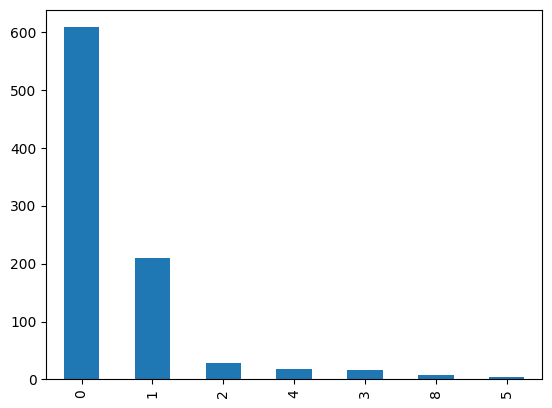

In [ ]:
#b
dt = train
dt['SibSp'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

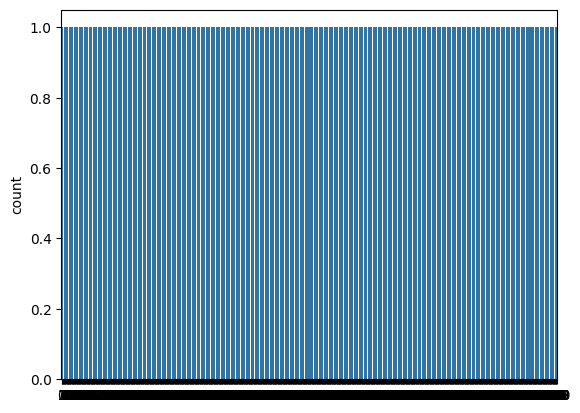

In [ ]:
sns.countplot(dt['SibSp'])

<Axes: >

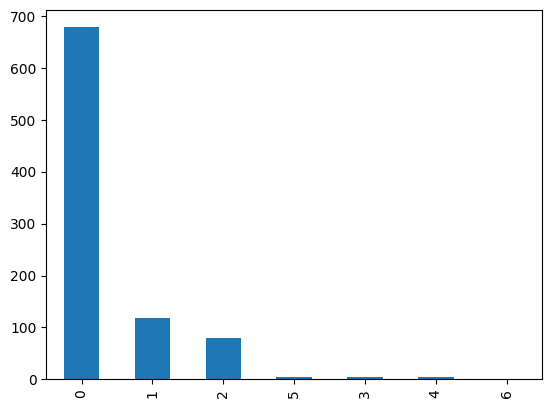

In [ ]:
dt['Parch'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Survived'>

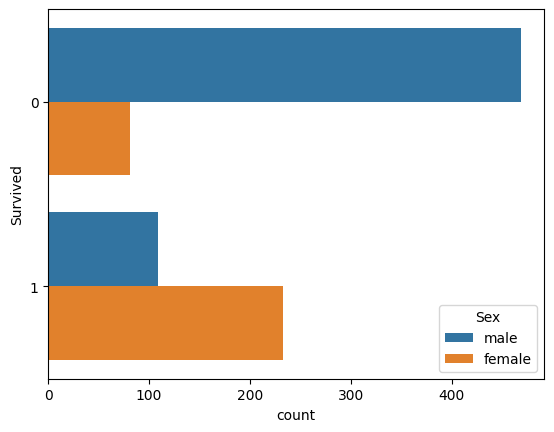

In [ ]:
# c
sns.countplot(y='Survived', hue='Sex', data = dt)

<Axes: xlabel='count', ylabel='Survived'>

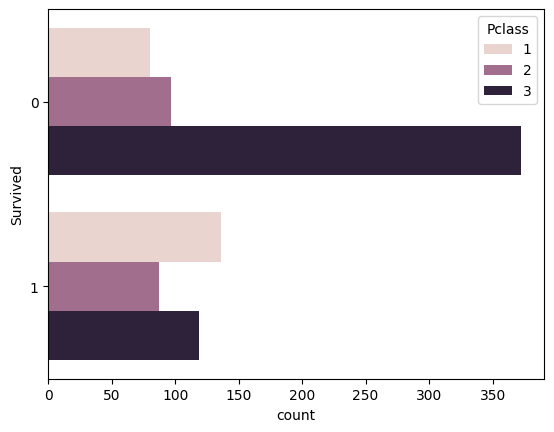

In [ ]:
sns.countplot(y='Survived', hue='Pclass', data = dt)

<Axes: >

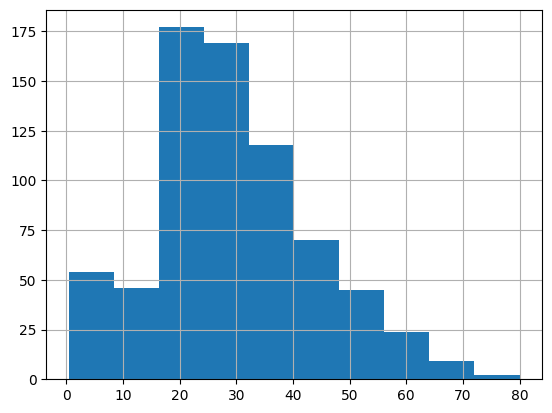

In [ ]:
# d
dt.Age.hist()

In [ ]:
#e descartables
dt.Ticket
dt.Name
dt.PassengerId
dt.Cabin # esta seria opcional, aunque hay bastante preprossecing que hacer

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# f
dt['NoCabin']=pd.isnull(dt.Cabin)*1 # 1 so no está informado
dt.groupby(['Pclass','NoCabin']).size()

Pclass  NoCabin
1       0          176
        1           40
2       0           16
        1          168
3       0           12
        1          479
dtype: int64

In [ ]:
dt.groupby(['Survived','NoCabin']).size()

Survived  NoCabin
0         0           68
          1          481
1         0          136
          1          206
dtype: int64

In [ ]:
dt.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
#g
dt.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

3. Ahora vamos a ajustar modelos logístico a partir de las columnas : 'Survived','Pclass','Sex','Age','SibSp','Parch','Fare'.
    
    a.En las filas donde Age  sea NA introduce la media total.\
    b.Transforma la columna Pclass, Sex en strings.\
    c.Convierte Pclass, Sex  en dummies. Quita las columnas que escojas como variables base.\
    d.Ajusta un modelo Logístico con todas las variables. Que Accuracy?\
    e.Dibuja la curva ROC y calcula el AUC.\
    f.Obten la confusion matrix. Haz un plot de ella.\
    g.Observa los p-valores del modelo? Que variables podríamos descartar?\
    h.Reentrena el modelo sin las columnas no significativas. Vuelve a obtener todas las métricas del modelo.


In [ ]:
dt=train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [ ]:
# a
dt.loc[dt.Age.isnull(),'Age']=dt.Age.mean()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


C:\Users\Propietario\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# b
dt.Pclass=dt.Pclass.apply(lambda x: str(x))
dt.Sex=dt.Sex.apply(lambda x: str(x))

C:\Users\Propietario\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#c
dt=pd.get_dummies(dt, drop_first=True)

In [ ]:
# d
from sklearn.model_selection import train_test_split
X=dt.drop('Survived', axis=1)
Y = dt['Survived']

# Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf=clf.fit(X_train, Y_train)

Y_pred=clf.predict(X_test)
probs=clf.predict_proba(X_test)

C:\Users\Propietario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# e
clf.score(X_test, Y_test)

0.7988826815642458

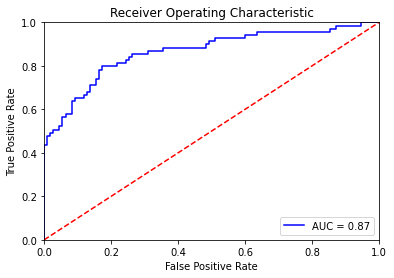

In [ ]:
# f

from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
#g
from LogisticReg import *
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Y_pred, Y_test)

In [ ]:
# h
import statsmodels.api as sm
X_test=sm.add_constant(X_test)
logit_model=sm.Logit(Y_test, X_test)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407058
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  179
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.3894
Time:                        17:35:49   Log-Likelihood:                -72.863
converged:                       True   LL-Null:                       -119.34
Covariance Type:            nonrobust   LLR p-value:                 3.070e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3676      1.048      3.213      0.001       1.314       5.422
Age           -0.0225      0.

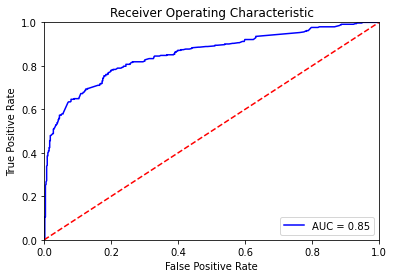

In [ ]:
# i
X=X.drop(['Parch','Fare'],axis=1)

clf = LogisticRegression(random_state=0, solver='lbfgs')
clf2 = clf.fit(X, Y)

y_pred=clf2.predict(X)

clf2.score(X,Y)

Y_pred=clf.predict(X)
probs=clf.predict_proba(X)
# roc
fpr, tpr, threshold = metrics.roc_curve(Y, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()